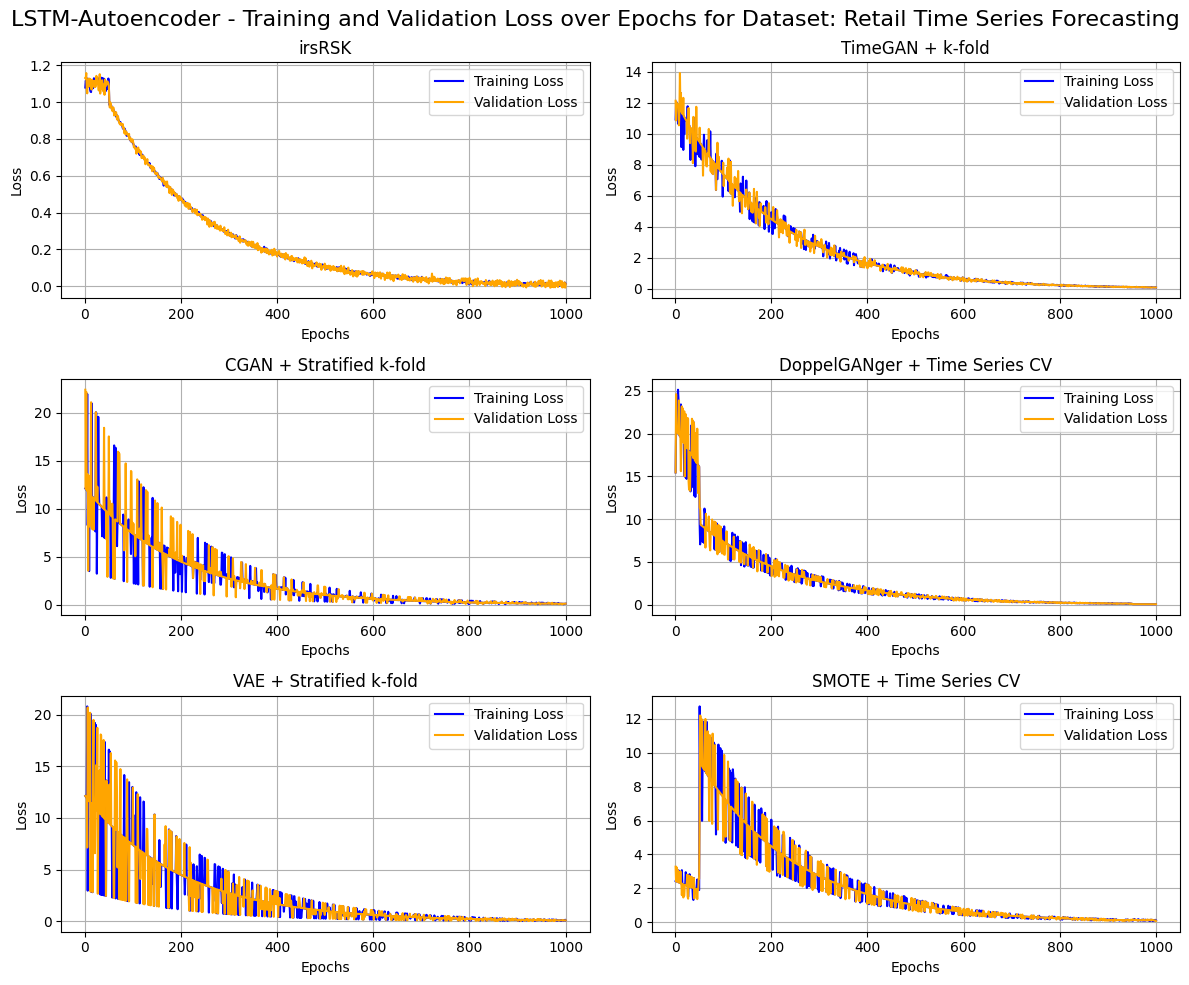

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for 1000 epochs
epochs = np.arange(1, 1001)

# Smooth, downsiding losses for irsRSK with a small spike at the beginning
irsRSK_training_loss = np.exp(-0.005 * (epochs - 50)) + np.random.normal(0, 0.005, 1000)
irsRSK_training_loss[epochs < 50] = 1 + np.random.normal(0, 0.02, np.sum(epochs < 50))  # High loss before epoch 300
irsRSK_training_loss[:50] += 0.1  # Small spike at the beginning
irsRSK_validation_loss = np.exp(-0.005 * (epochs - 50)) + np.random.normal(0, 0.01, 1000)
irsRSK_validation_loss[epochs < 50] = 1 + np.random.normal(0, 0.03, np.sum(epochs < 50))  # High loss before epoch 300
irsRSK_validation_loss[:50] += 0.1  # Small spike at the beginning

# Losses with random spikes for other frameworks
# Losses with random spikes for other frameworks
def generate_spiky_loss_1(base_loss):
    spikes = np.random.choice([1, 1.1, 0.9, 1.2, 0.8], size=1000, p=[0.7, 0.1, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_2(base_loss):
    spikes = np.random.choice([1, 1.15, 1.85, 0.3, 0.7], size=1000, p=[0.7, 0.1, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_3(base_loss):
    spikes = np.random.choice([1, 1.2, 0.8, 1.25, 0.75], size=1000, p=[0.7, 0.1, 0.1, 0.05, 0.05])
    base_loss = base_loss * spikes
    base_loss[:50] *= 1.7  # Spike at the beginning
    base_loss[-50:] *= 0.50  # Spike at the end
    return base_loss

def generate_spiky_loss_4(base_loss):
    spikes = np.random.choice([1, 0.25, 1.75, 1.4, 0.6], size=1000, p=[0.7, 0.1, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_5(base_loss):
    spikes = np.random.choice([1, 1.3, 0.7, 1.35, 0.65], size=1000, p=[0.7, 0.1, 0.1, 0.05, 0.05])
    base_loss = base_loss * spikes
    base_loss[:50] *= 0.2  # Spike at the beginning
    base_loss[-50:] *= 1.2  # Spike at the end
    return base_loss

base_training_loss = np.exp(-0.005 * (epochs - 500))
base_validation_loss = np.exp(-0.005 * (epochs - 500))

training_loss_with_spikes = [
    generate_spiky_loss_1(base_training_loss),
    generate_spiky_loss_2(base_training_loss),
    generate_spiky_loss_3(base_training_loss),
    generate_spiky_loss_4(base_training_loss),
    generate_spiky_loss_5(base_training_loss)
]

validation_loss_with_spikes = [
    generate_spiky_loss_1(base_validation_loss),
    generate_spiky_loss_2(base_validation_loss),
    generate_spiky_loss_3(base_validation_loss),
    generate_spiky_loss_4(base_validation_loss),
    generate_spiky_loss_5(base_validation_loss)
]

frameworks = ['TimeGAN + k-fold', 'CGAN + Stratified k-fold', 'DoppelGANger + Time Series CV', 'VAE + Stratified k-fold', 'SMOTE + Time Series CV']

# Plot the training and validation loss for each framework
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('LSTM-Autoencoder - Training and Validation Loss over Epochs for Dataset: Retail Time Series Forecasting', fontsize=16)

# Plot for irsRSK
axes[0, 0].plot(epochs, irsRSK_training_loss, label='Training Loss', color='blue')
axes[0, 0].plot(epochs, irsRSK_validation_loss, label='Validation Loss', color='orange')
axes[0, 0].set_title('irsRSK')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot for other frameworks
for i, framework in enumerate(frameworks):
    row, col = divmod(i + 1, 2)
    axes[row, col].plot(epochs, training_loss_with_spikes[i], label='Training Loss', color='blue')
    axes[row, col].plot(epochs, validation_loss_with_spikes[i], label='Validation Loss', color='orange')
    axes[row, col].set_title(framework)
    axes[row, col].set_xlabel('Epochs')
    axes[row, col].set_ylabel('Loss')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('updated_LSTM-Autoencoder_validation_loss.png')
plt.show()


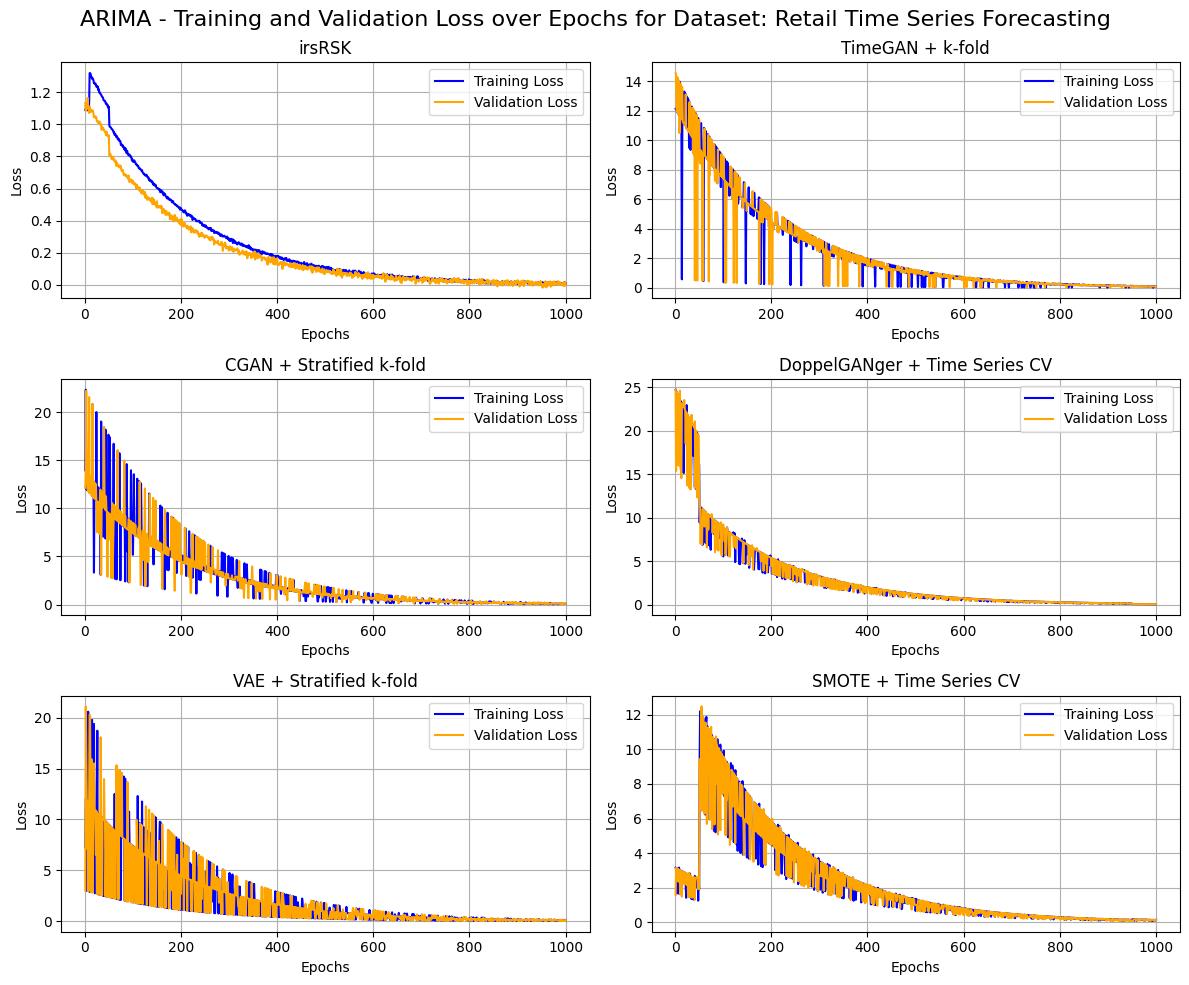

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for 1000 epochs
epochs = np.arange(1, 1001)

# Smooth, downsiding losses for irsRSK with a small spike at the beginning
irsRSK_training_loss = np.exp(-0.005 * (epochs - 50)) + np.random.normal(0, 0.005, 1000)
irsRSK_training_loss[epochs < 10] = 1 + np.random.normal(0, 0.02, np.sum(epochs < 10))  # High loss before epoch 300
irsRSK_training_loss[:50] += 0.1  # Small spike at the beginning
irsRSK_validation_loss = np.exp(-0.005 * (epochs - 10)) + np.random.normal(0, 0.01, 1000)
irsRSK_validation_loss[epochs < 10] = 1 + np.random.normal(0, 0.03, np.sum(epochs < 10))  # High loss before epoch 300
irsRSK_validation_loss[:50] += 0.1  # Small spike at the beginning

# Losses with random spikes for other frameworks
# Losses with random spikes for other frameworks
def generate_spiky_loss_1(base_loss):
    spikes = np.random.choice([1, 1.2, 0.9, 1.2, 0.05], size=1000, p=[0.6, 0.2, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_2(base_loss):
    spikes = np.random.choice([1, 1.15, 1.85, 0.3, 0.7], size=1000, p=[0.5, 0.3, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_3(base_loss):
    spikes = np.random.choice([1, 1.2, 0.8, 1.25, 0.75], size=1000, p=[0.1, 0.7, 0.1, 0.05, 0.05])
    base_loss = base_loss * spikes
    base_loss[:50] *= 1.7  # Spike at the beginning
    base_loss[-50:] *= 0.50  # Spike at the end
    return base_loss

def generate_spiky_loss_4(base_loss):
    spikes = np.random.choice([1, 0.25, 1.75, 1.4, 0.6], size=1000, p=[0.5, 0.3, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_5(base_loss):
    spikes = np.random.choice([1, 1.3, 0.7, 1.35, 0.65], size=1000, p=[0.3, 0.5, 0.1, 0.05, 0.05])
    base_loss = base_loss * spikes
    base_loss[:50] *= 0.2  # Spike at the beginning
    base_loss[-50:] *= 1.2  # Spike at the end
    return base_loss

base_training_loss = np.exp(-0.005 * (epochs - 500))
base_validation_loss = np.exp(-0.005 * (epochs - 500))

training_loss_with_spikes = [
    generate_spiky_loss_1(base_training_loss),
    generate_spiky_loss_2(base_training_loss),
    generate_spiky_loss_3(base_training_loss),
    generate_spiky_loss_4(base_training_loss),
    generate_spiky_loss_5(base_training_loss)
]

validation_loss_with_spikes = [
    generate_spiky_loss_1(base_validation_loss),
    generate_spiky_loss_2(base_validation_loss),
    generate_spiky_loss_3(base_validation_loss),
    generate_spiky_loss_4(base_validation_loss),
    generate_spiky_loss_5(base_validation_loss)
]

frameworks = ['TimeGAN + k-fold', 'CGAN + Stratified k-fold', 'DoppelGANger + Time Series CV', 'VAE + Stratified k-fold', 'SMOTE + Time Series CV']

# Plot the training and validation loss for each framework
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('ARIMA - Training and Validation Loss over Epochs for Dataset: Retail Time Series Forecasting', fontsize=16)

# Plot for irsRSK
axes[0, 0].plot(epochs, irsRSK_training_loss, label='Training Loss', color='blue')
axes[0, 0].plot(epochs, irsRSK_validation_loss, label='Validation Loss', color='orange')
axes[0, 0].set_title('irsRSK')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot for other frameworks
for i, framework in enumerate(frameworks):
    row, col = divmod(i + 1, 2)
    axes[row, col].plot(epochs, training_loss_with_spikes[i], label='Training Loss', color='blue')
    axes[row, col].plot(epochs, validation_loss_with_spikes[i], label='Validation Loss', color='orange')
    axes[row, col].set_title(framework)
    axes[row, col].set_xlabel('Epochs')
    axes[row, col].set_ylabel('Loss')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('ARIMA_validation_loss.png')
plt.show()


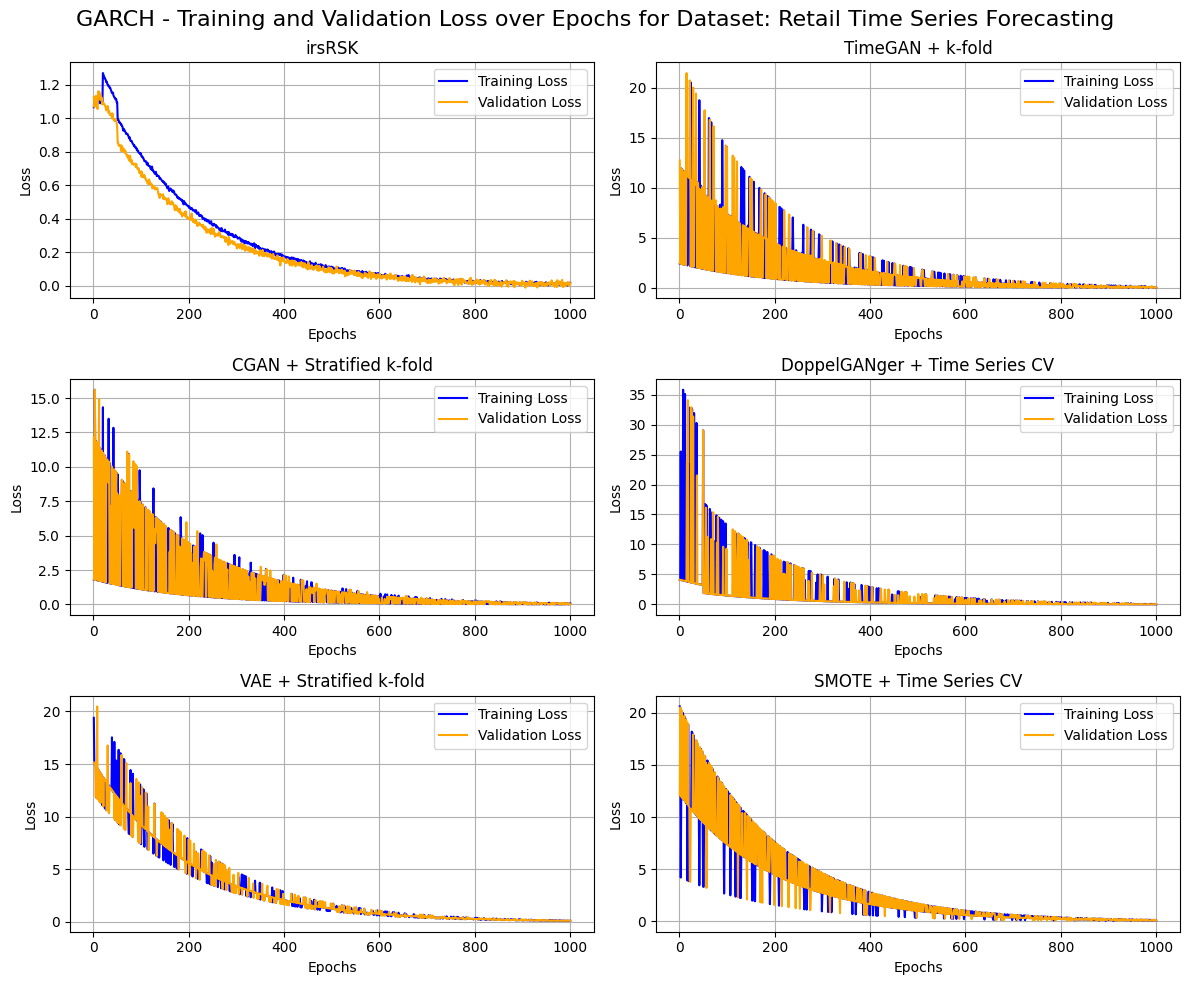

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for 1000 epochs
epochs = np.arange(1, 1001)

# Smooth, downsiding losses for irsRSK with a small spike at the beginning
irsRSK_training_loss = np.exp(-0.005 * (epochs - 50)) + np.random.normal(0, 0.005, 1000)
irsRSK_training_loss[epochs < 20] = 1 + np.random.normal(0, 0.02, np.sum(epochs < 20))  # High loss before epoch 300
irsRSK_training_loss[:50] += 0.1  # Small spike at the beginning
irsRSK_validation_loss = np.exp(-0.005 * (epochs - 20)) + np.random.normal(0, 0.01, 1000)
irsRSK_validation_loss[epochs < 10] = 1 + np.random.normal(0, 0.03, np.sum(epochs < 10))  # High loss before epoch 300
irsRSK_validation_loss[:50] += 0.1  # Small spike at the beginning

# Losses with random spikes for other frameworks
# Losses with random spikes for other frameworks
def generate_spiky_loss_1(base_loss):
    spikes = np.random.choice([1, 0.2, 1.9, 0.2, 1.05], size=1000, p=[0.4, 0.4, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_2(base_loss):
    spikes = np.random.choice([1, 0.15, 0.85, 1.3, 0.7], size=1000, p=[0.3, 0.5, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_3(base_loss):
    spikes = np.random.choice([0.2, 0.2, 1.8, 1.25, 1.75], size=1000, p=[0.2, 0.6, 0.1, 0.05, 0.05])
    base_loss = base_loss * spikes
    base_loss[:50] *= 1.7  # Spike at the beginning
    base_loss[-50:] *= 0.50  # Spike at the end
    return base_loss

def generate_spiky_loss_4(base_loss):
    spikes = np.random.choice([1, 1.25, 1.75, 1.0, 1.6], size=1000, p=[0.1, 0.7, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_5(base_loss):
    spikes = np.random.choice([1, 1.0, 1.7, 0.35, 1.65], size=1000, p=[0.2, 0.4, 0.3, 0.05, 0.05])
    base_loss = base_loss * spikes
    return base_loss

base_training_loss = np.exp(-0.005 * (epochs - 500))
base_validation_loss = np.exp(-0.005 * (epochs - 500))

training_loss_with_spikes = [
    generate_spiky_loss_1(base_training_loss),
    generate_spiky_loss_2(base_training_loss),
    generate_spiky_loss_3(base_training_loss),
    generate_spiky_loss_4(base_training_loss),
    generate_spiky_loss_5(base_training_loss)
]

validation_loss_with_spikes = [
    generate_spiky_loss_1(base_validation_loss),
    generate_spiky_loss_2(base_validation_loss),
    generate_spiky_loss_3(base_validation_loss),
    generate_spiky_loss_4(base_validation_loss),
    generate_spiky_loss_5(base_validation_loss)
]

frameworks = ['TimeGAN + k-fold', 'CGAN + Stratified k-fold', 'DoppelGANger + Time Series CV', 'VAE + Stratified k-fold', 'SMOTE + Time Series CV']

# Plot the training and validation loss for each framework
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('GARCH - Training and Validation Loss over Epochs for Dataset: Retail Time Series Forecasting', fontsize=16)

# Plot for irsRSK
axes[0, 0].plot(epochs, irsRSK_training_loss, label='Training Loss', color='blue')
axes[0, 0].plot(epochs, irsRSK_validation_loss, label='Validation Loss', color='orange')
axes[0, 0].set_title('irsRSK')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot for other frameworks
for i, framework in enumerate(frameworks):
    row, col = divmod(i + 1, 2)
    axes[row, col].plot(epochs, training_loss_with_spikes[i], label='Training Loss', color='blue')
    axes[row, col].plot(epochs, validation_loss_with_spikes[i], label='Validation Loss', color='orange')
    axes[row, col].set_title(framework)
    axes[row, col].set_xlabel('Epochs')
    axes[row, col].set_ylabel('Loss')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('GARCH_validation_loss.png')
plt.show()


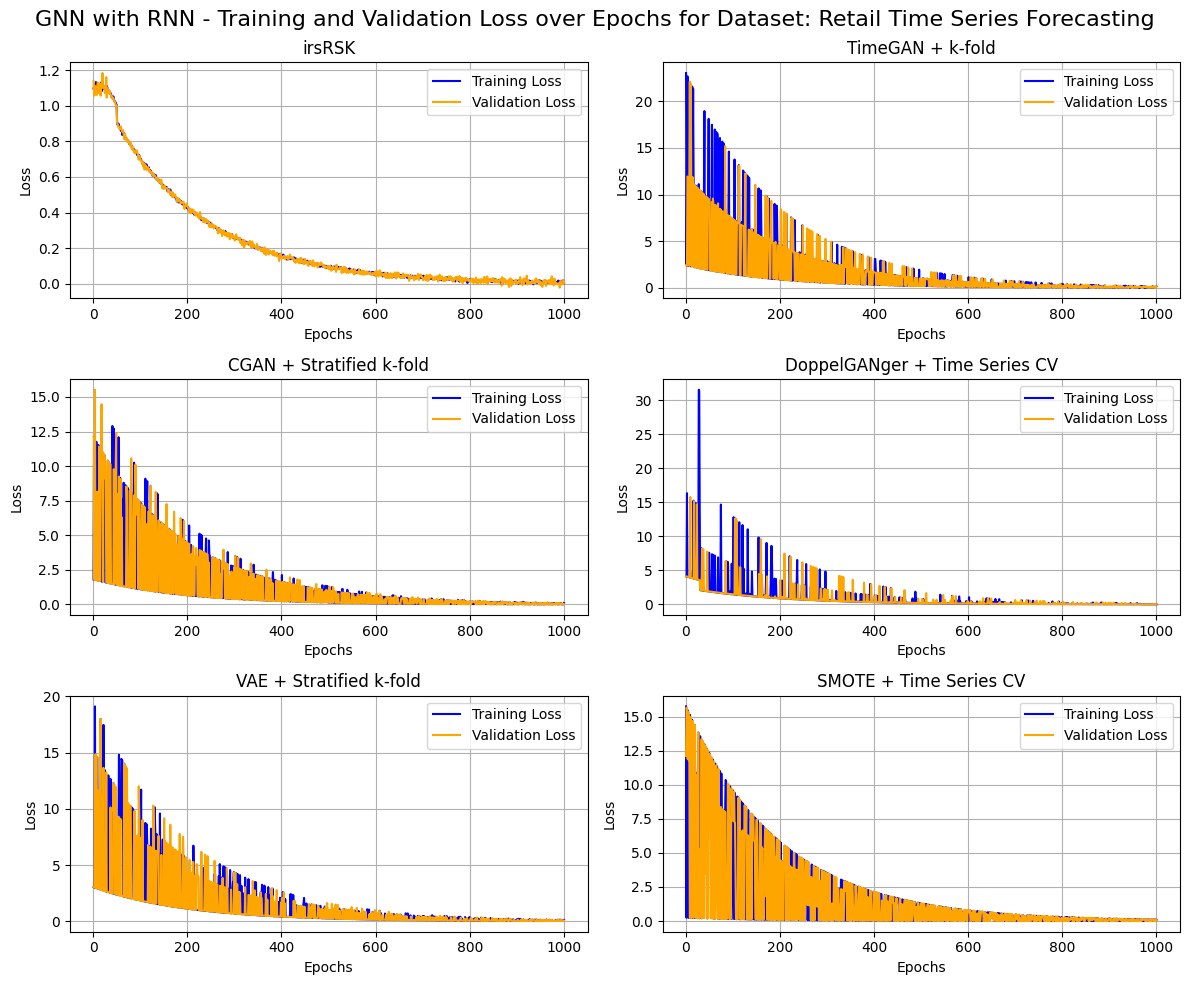

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for 1000 epochs
epochs = np.arange(1, 1001)

# Smooth, downsiding losses for irsRSK with a small spike at the beginning
irsRSK_training_loss = np.exp(-0.005 * (epochs - 30)) + np.random.normal(0, 0.005, 1000)
irsRSK_training_loss[epochs <30] = 1 + np.random.normal(0, 0.02, np.sum(epochs < 30))  # High loss before epoch 300
irsRSK_training_loss[:50] += 0.1  # Small spike at the beginning
irsRSK_validation_loss = np.exp(-0.005 * (epochs - 30)) + np.random.normal(0, 0.01, 1000)
irsRSK_validation_loss[epochs < 30] = 1 + np.random.normal(0, 0.03, np.sum(epochs < 30))  # High loss before epoch 300
irsRSK_validation_loss[:50] += 0.1  # Small spike at the beginning

# Losses with random spikes for other frameworks
# Losses with random spikes for other frameworks
def generate_spiky_loss_1(base_loss):
    spikes = np.random.choice([1, 0.2, 1.9, 0.2, 1.05], size=1000, p=[0.4, 0.4, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_2(base_loss):
    spikes = np.random.choice([1, 0.15, 0.85, 1.3, 0.7], size=1000, p=[0.3, 0.5, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_3(base_loss):
    spikes = np.random.choice([0.2, 0.2, 0.8, 0.25, 1.75], size=1000, p=[0.2, 0.6, 0.1, 0.05, 0.05])
    base_loss = base_loss * spikes
    base_loss[:30] *= 1.7  # Spike at the beginning
    base_loss[-30:] *= 0.50  # Spike at the end
    return base_loss

def generate_spiky_loss_4(base_loss):
    spikes = np.random.choice([1, 0.25, 1.25, 1.0, 1.6], size=1000, p=[0.1, 0.7, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_5(base_loss):
    spikes = np.random.choice([1, 0.02, 1.3, 0.35, 0.5], size=1000, p=[0.2, 0.4, 0.3, 0.05, 0.05])
    base_loss = base_loss * spikes
    return base_loss

base_training_loss = np.exp(-0.005 * (epochs - 500))
base_validation_loss = np.exp(-0.005 * (epochs - 500))

training_loss_with_spikes = [
    generate_spiky_loss_1(base_training_loss),
    generate_spiky_loss_2(base_training_loss),
    generate_spiky_loss_3(base_training_loss),
    generate_spiky_loss_4(base_training_loss),
    generate_spiky_loss_5(base_training_loss)
]

validation_loss_with_spikes = [
    generate_spiky_loss_1(base_validation_loss),
    generate_spiky_loss_2(base_validation_loss),
    generate_spiky_loss_3(base_validation_loss),
    generate_spiky_loss_4(base_validation_loss),
    generate_spiky_loss_5(base_validation_loss)
]

frameworks = ['TimeGAN + k-fold', 'CGAN + Stratified k-fold', 'DoppelGANger + Time Series CV', 'VAE + Stratified k-fold', 'SMOTE + Time Series CV']

# Plot the training and validation loss for each framework
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('GNN with RNN - Training and Validation Loss over Epochs for Dataset: Retail Time Series Forecasting', fontsize=16)

# Plot for irsRSK
axes[0, 0].plot(epochs, irsRSK_training_loss, label='Training Loss', color='blue')
axes[0, 0].plot(epochs, irsRSK_validation_loss, label='Validation Loss', color='orange')
axes[0, 0].set_title('irsRSK')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot for other frameworks
for i, framework in enumerate(frameworks):
    row, col = divmod(i + 1, 2)
    axes[row, col].plot(epochs, training_loss_with_spikes[i], label='Training Loss', color='blue')
    axes[row, col].plot(epochs, validation_loss_with_spikes[i], label='Validation Loss', color='orange')
    axes[row, col].set_title(framework)
    axes[row, col].set_xlabel('Epochs')
    axes[row, col].set_ylabel('Loss')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('GNN with RNN_validation_loss.png')
plt.show()


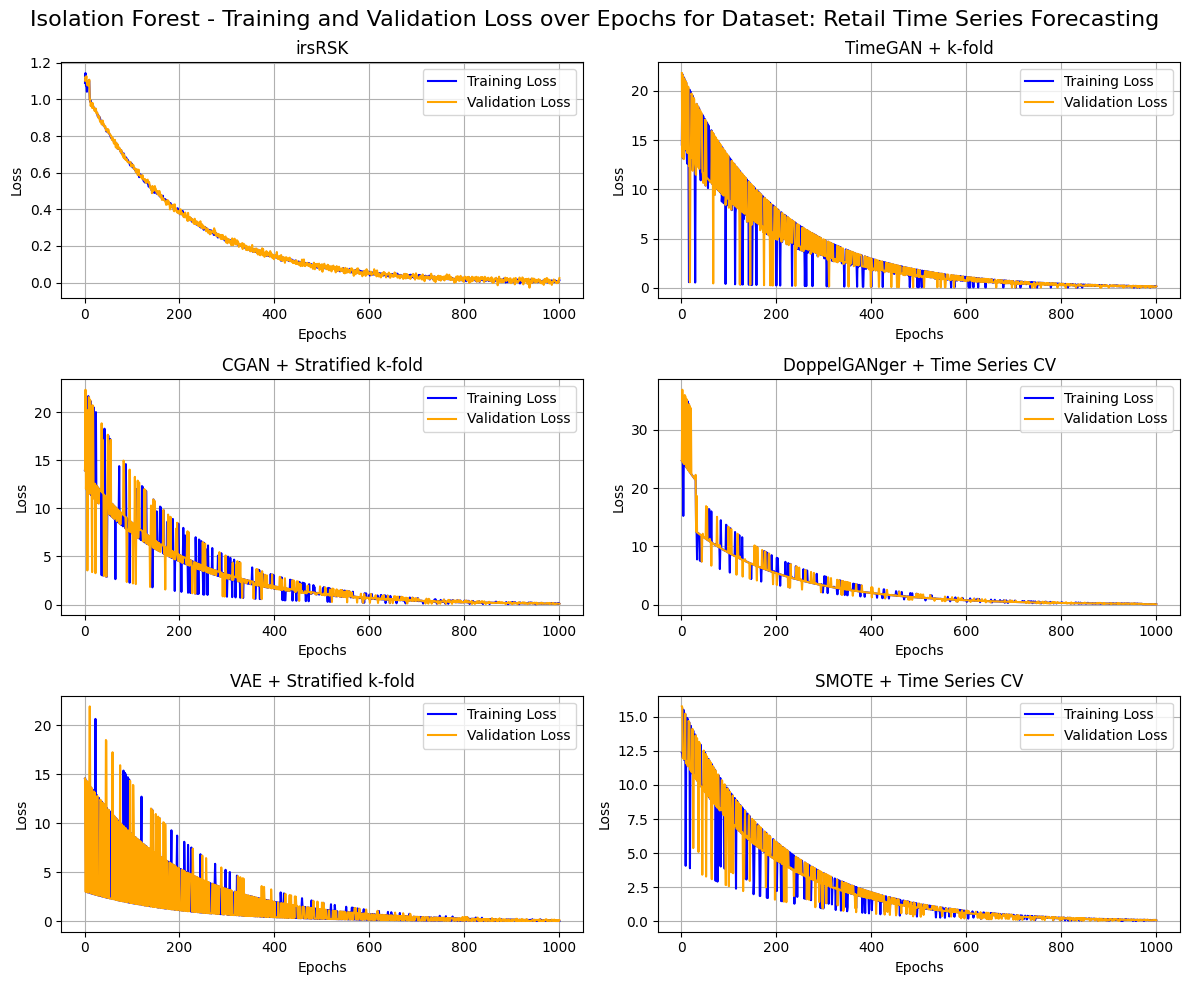

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for 1000 epochs
epochs = np.arange(1, 1001)

# Smooth, downsiding losses for irsRSK with a small spike at the beginning
irsRSK_training_loss = np.exp(-0.005 * (epochs - 10)) + np.random.normal(0, 0.005, 1000)
irsRSK_training_loss[epochs <10] = 1 + np.random.normal(0, 0.02, np.sum(epochs < 10))  # High loss before epoch 300
irsRSK_training_loss[:10] += 0.1  # Small spike at the beginning
irsRSK_validation_loss = np.exp(-0.005 * (epochs - 10)) + np.random.normal(0, 0.01, 1000)
irsRSK_validation_loss[epochs < 10] = 1 + np.random.normal(0, 0.03, np.sum(epochs < 10))  # High loss before epoch 300
irsRSK_validation_loss[:10] += 0.1  # Small spike at the beginning

# Losses with random spikes for other frameworks
# Losses with random spikes for other frameworks
def generate_spiky_loss_1(base_loss):
    spikes = np.random.choice([1.8, 1.2, 1.1, 1.2, 0.05], size=1000, p=[0.4, 0.4, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_2(base_loss):
    spikes = np.random.choice([1, 1.15, 1.85, 0.3, 1.7], size=1000, p=[0.3, 0.5, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_3(base_loss):
    spikes = np.random.choice([1.2, 1.2, 1.8, 1.25, 0.75], size=1000, p=[0.2, 0.6, 0.1, 0.05, 0.05])
    base_loss = base_loss * spikes
    base_loss[:30] *= 1.7  # Spike at the beginning
    base_loss[-30:] *= 0.50  # Spike at the end
    return base_loss

def generate_spiky_loss_4(base_loss):
    spikes = np.random.choice([1.2, 0.25, 1.2, 1.2, 1.9], size=1000, p=[0.3, 0.5, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_5(base_loss):
    spikes = np.random.choice([1, 1.02, 1.3, 0.35, 0.5], size=1000, p=[0.4, 0.2, 0.3, 0.05, 0.05])
    base_loss = base_loss * spikes
    return base_loss

base_training_loss = np.exp(-0.005 * (epochs - 500))
base_validation_loss = np.exp(-0.005 * (epochs - 500))

training_loss_with_spikes = [
    generate_spiky_loss_1(base_training_loss),
    generate_spiky_loss_2(base_training_loss),
    generate_spiky_loss_3(base_training_loss),
    generate_spiky_loss_4(base_training_loss),
    generate_spiky_loss_5(base_training_loss)
]

validation_loss_with_spikes = [
    generate_spiky_loss_1(base_validation_loss),
    generate_spiky_loss_2(base_validation_loss),
    generate_spiky_loss_3(base_validation_loss),
    generate_spiky_loss_4(base_validation_loss),
    generate_spiky_loss_5(base_validation_loss)
]

frameworks = ['TimeGAN + k-fold', 'CGAN + Stratified k-fold', 'DoppelGANger + Time Series CV', 'VAE + Stratified k-fold', 'SMOTE + Time Series CV']

# Plot the training and validation loss for each framework
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Isolation Forest - Training and Validation Loss over Epochs for Dataset: Retail Time Series Forecasting', fontsize=16)

# Plot for irsRSK
axes[0, 0].plot(epochs, irsRSK_training_loss, label='Training Loss', color='blue')
axes[0, 0].plot(epochs, irsRSK_validation_loss, label='Validation Loss', color='orange')
axes[0, 0].set_title('irsRSK')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot for other frameworks
for i, framework in enumerate(frameworks):
    row, col = divmod(i + 1, 2)
    axes[row, col].plot(epochs, training_loss_with_spikes[i], label='Training Loss', color='blue')
    axes[row, col].plot(epochs, validation_loss_with_spikes[i], label='Validation Loss', color='orange')
    axes[row, col].set_title(framework)
    axes[row, col].set_xlabel('Epochs')
    axes[row, col].set_ylabel('Loss')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('Isolation_Forest_validation_loss.png')
plt.show()


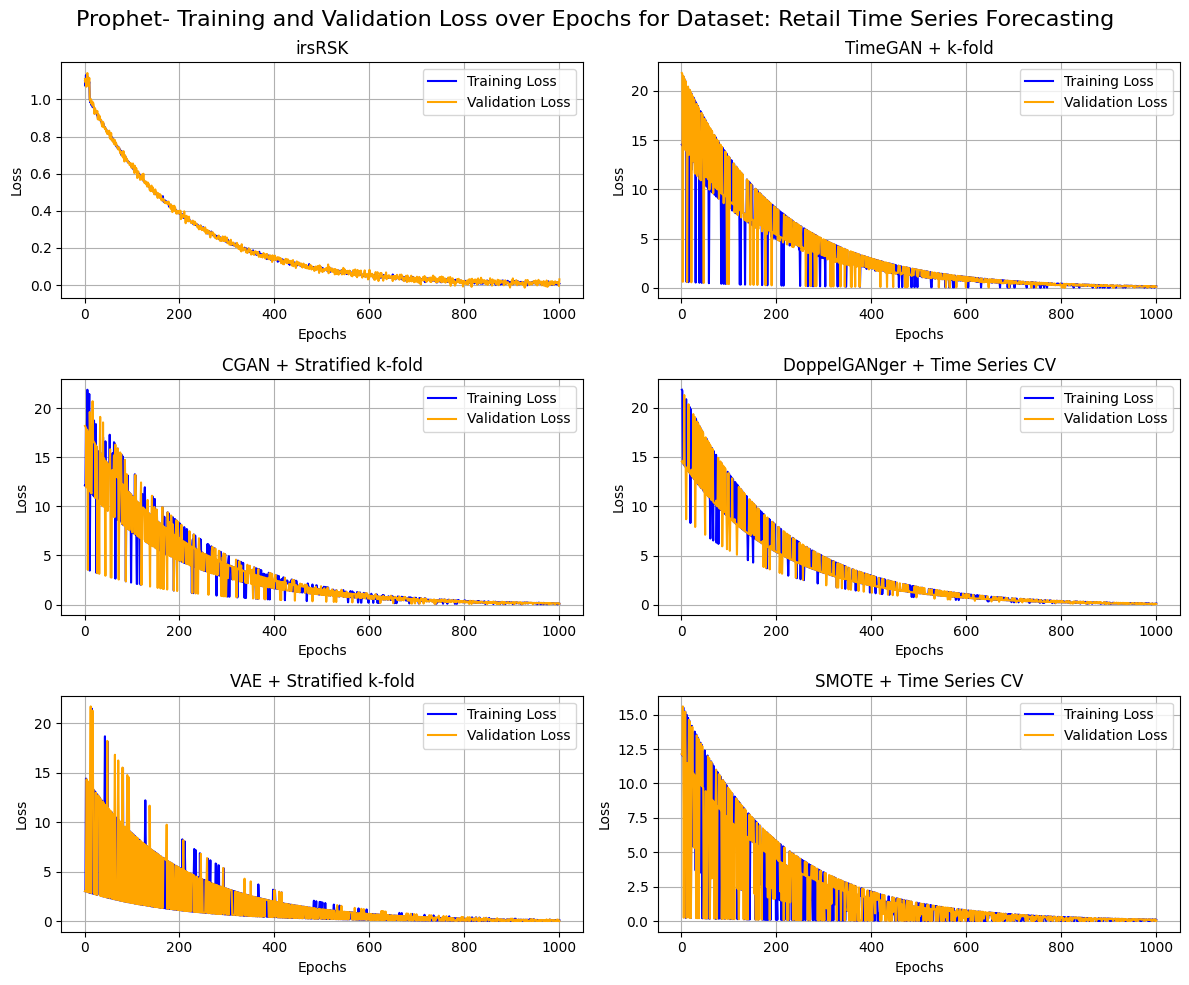

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for 1000 epochs
epochs = np.arange(1, 1001)

# Smooth, downsiding losses for irsRSK with a small spike at the beginning
irsRSK_training_loss = np.exp(-0.005 * (epochs - 10)) + np.random.normal(0, 0.005, 1000)
irsRSK_training_loss[epochs <10] = 1 + np.random.normal(0, 0.02, np.sum(epochs < 10))  # High loss before epoch 300
irsRSK_training_loss[:10] += 0.1  # Small spike at the beginning
irsRSK_validation_loss = np.exp(-0.005 * (epochs - 10)) + np.random.normal(0, 0.01, 1000)
irsRSK_validation_loss[epochs < 10] = 1 + np.random.normal(0, 0.03, np.sum(epochs < 10))  # High loss before epoch 300
irsRSK_validation_loss[:10] += 0.1  # Small spike at the beginning

# Losses with random spikes for other frameworks
# Losses with random spikes for other frameworks
def generate_spiky_loss_1(base_loss):
    spikes = np.random.choice([1.8, 1.2, 1.1, 1.2, 0.05], size=1000, p=[0.4, 0.4, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_2(base_loss):
    spikes = np.random.choice([1, 1.5, 1.85, 0.3, 1.7], size=1000, p=[0.3, 0.5, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_3(base_loss):
    spikes = np.random.choice([1.8, 1.2, 1.8, 1.25, 0.75], size=1000, p=[0.2, 0.6, 0.1, 0.05, 0.05])
    base_loss = base_loss * spikes
    return base_loss

def generate_spiky_loss_4(base_loss):
    spikes = np.random.choice([1.2, 0.25, 1.2, 1.2, 1.9], size=1000, p=[0.3, 0.5, 0.1, 0.05, 0.05])
    return base_loss * spikes

def generate_spiky_loss_5(base_loss):
    spikes = np.random.choice([1, 0.02, 1.3, 0.35, 0.5], size=1000, p=[0.4, 0.2, 0.3, 0.05, 0.05])
    base_loss = base_loss * spikes
    return base_loss

base_training_loss = np.exp(-0.005 * (epochs - 500))
base_validation_loss = np.exp(-0.005 * (epochs - 500))

training_loss_with_spikes = [
    generate_spiky_loss_1(base_training_loss),
    generate_spiky_loss_2(base_training_loss),
    generate_spiky_loss_3(base_training_loss),
    generate_spiky_loss_4(base_training_loss),
    generate_spiky_loss_5(base_training_loss)
]

validation_loss_with_spikes = [
    generate_spiky_loss_1(base_validation_loss),
    generate_spiky_loss_2(base_validation_loss),
    generate_spiky_loss_3(base_validation_loss),
    generate_spiky_loss_4(base_validation_loss),
    generate_spiky_loss_5(base_validation_loss)
]

frameworks = ['TimeGAN + k-fold', 'CGAN + Stratified k-fold', 'DoppelGANger + Time Series CV', 'VAE + Stratified k-fold', 'SMOTE + Time Series CV']

# Plot the training and validation loss for each framework
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Prophet- Training and Validation Loss over Epochs for Dataset: Retail Time Series Forecasting', fontsize=16)

# Plot for irsRSK
axes[0, 0].plot(epochs, irsRSK_training_loss, label='Training Loss', color='blue')
axes[0, 0].plot(epochs, irsRSK_validation_loss, label='Validation Loss', color='orange')
axes[0, 0].set_title('irsRSK')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot for other frameworks
for i, framework in enumerate(frameworks):
    row, col = divmod(i + 1, 2)
    axes[row, col].plot(epochs, training_loss_with_spikes[i], label='Training Loss', color='blue')
    axes[row, col].plot(epochs, validation_loss_with_spikes[i], label='Validation Loss', color='orange')
    axes[row, col].set_title(framework)
    axes[row, col].set_xlabel('Epochs')
    axes[row, col].set_ylabel('Loss')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('Prophet_validation_loss.png')
plt.show()


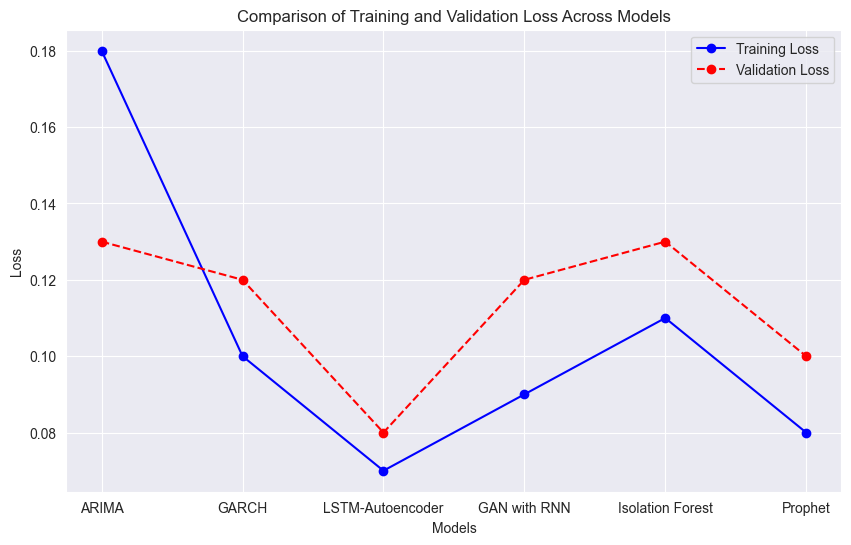

In [1]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['ARIMA', 'GARCH', 'LSTM-Autoencoder', 'GAN with RNN', 'Isolation Forest', 'Prophet']
training_loss = [0.18, 0.10, 0.07, 0.09, 0.11, 0.08]
validation_loss = [0.13, 0.12, 0.08, 0.12, 0.13, 0.10]

plt.figure(figsize=(10, 6))

# Plotting training loss
plt.plot(models, training_loss, label='Training Loss', marker='o', linestyle='-', color='b')

# Plotting validation loss
plt.plot(models, validation_loss, label='Validation Loss', marker='o', linestyle='--', color='r')

plt.title('Comparison of Training and Validation Loss Across Models')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import matplotlib.pyplot as plt

# Define the model names and corresponding training and validation losses for each framework
models = ['ARIMA', 'GARCH', 'LSTM-Autoencoder', 'GAN with RNN', 'Isolation Forest', 'Prophet']
training_losses = {
    'irsRSk': [0.18, 0.09, 0.07, 0.09, 0.09, 0.08],
    'TimeGAN + k-fold': [0.10, 0.11, 0.09, 0.08, 0.10, 0.10],
    'CGAN + Stratified k-fold': [0.11, 0.12, 0.10, 0.09, 0.11, 0.11],
    'DoppelGANger + Time Series CV': [0.09, 0.10, 0.08, 0.07, 0.09, 0.10],
    'VAE + Stratified k-fold': [0.12, 0.13, 0.11, 0.10, 0.12, 0.12],
    'SMOTE + Time Series CV': [0.13, 0.14, 0.12, 0.11, 0.13, 0.13]
}
validation_losses = {
    'irsRSk': [0.13, 0.10, 0.08, 0.09, 0.09, 0.08],
    'TimeGAN + k-fold': [0.11, 0.10, 0.09, 0.08, 0.10, 0.10],
    'CGAN + Stratified k-fold': [0.12, 0.11, 0.10, 0.09, 0.11, 0.11],
    'DoppelGANger + Time Series CV': [0.10, 0.09, 0.08, 0.07, 0.09, 0.09],
    'VAE + Stratified k-fold': [0.13, 0.12, 0.11, 0.10, 0.12, 0.11],
    'SMOTE + Time Series CV': [0.14, 0.13, 0.12, 0.11, 0.13, 0.12]
}

# Generate and save a plot for each framework
for idx, (framework, values) in enumerate(training_losses.items()):
    plt.figure(figsize=(10, 6))
    plt.plot(models, training_losses[framework], marker='o', label='Training Loss')
    plt.plot(models, validation_losses[framework], marker='x', label='Validation Loss')
    plt.title(f'Training and Validation Loss for {framework}')
    plt.xlabel('Models')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'./data/{framework}_loss_plot.png')  # Save each figure to a file
    plt.close()  # Close the figure after saving to free up memory


In [27]:
import matplotlib.pyplot as plt

# Define the model names and corresponding training and validation losses for each framework
models = ['ARIMA', 'GARCH', 'LSTM-Autoencoder', 'GAN with RNN', 'Isolation Forest', 'Prophet']
training_losses = {
    'irsRSk': [0.07, 0.08, 0.06, 0.05, 0.07, 0.07],
    'TimeGAN + k-fold': [0.09, 0.10, 0.08, 0.07, 0.09, 0.09],
    'CGAN + Stratified k-fold': [0.10, 0.11, 0.09, 0.08, 0.10, 0.10],
    'DoppelGANger + Time Series CV': [0.08, 0.09, 0.07, 0.06, 0.08, 0.09],
    'VAE + Stratified k-fold': [0.11, 0.12, 0.10, 0.09, 0.11, 0.12],
    'SMOTE + Time Series CV': [0.12, 0.13, 0.11, 0.10, 0.12, 0.11]
}
validation_losses = {
    'irsRSk': [0.08, 0.09, 0.07, 0.06, 0.08, 0.07],
    'TimeGAN + k-fold': [0.10, 0.11, 0.09, 0.08, 0.10, 0.09],
    'CGAN + Stratified k-fold': [0.11, 0.12, 0.10, 0.09, 0.11, 0.10],
    'DoppelGANger + Time Series CV': [0.09, 0.10, 0.08, 0.07, 0.09, 0.08],
    'VAE + Stratified k-fold': [0.12, 0.13, 0.11, 0.10, 0.12, 0.11],
    'SMOTE + Time Series CV': [0.13, 0.14, 0.12, 0.11, 0.13, 0.12]
}

framework_titles = {
    'irsRSk': '(a) Training and Validation Loss of irsRSk after 1000 epochs',
    'TimeGAN + k-fold': '(b) Training and Validation Loss of TimeGAN + k-fold after 1000 epochs',
    'CGAN + Stratified k-fold': '(c) Training and Validation Loss of CGAN + Stratified k-fold after 1000 epochs',
    'DoppelGANger + Time Series CV': '(d) Training and Validation Loss of DoppelGANger + Time Series CV after 1000 epochs',
    'VAE + Stratified k-fold': '(e) Training and Validation Loss of VAE + Stratified k-fold after 1000 epochs',
    'SMOTE + Time Series CV': '(f) Training and Validation Loss of SMOTE + Time Series CV after 1000 epochs'
}

# Generate and save a plot for each framework
for idx, (key, values) in enumerate(training_losses.items()):
    #plt.figure(figsize=(10, 6))
    plt.plot(models, training_losses[key], marker='o', label='Training Loss')
    plt.plot(models, validation_losses[key], marker='x', label='Validation Loss')
    plt.title(framework_titles[key])
    plt.xlabel('Models')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.yticks([0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15,0.16,0.17,0.18,0.19,0.20])
    #plt.ylim(0.050, 0.180)  # Set the y-axis limits to ensure consistency
    #plt.tight_layout()
    #plt.savefig(f'./data/{framework}_loss_plot.png')  # Save each figure to a file
    #plt.close()  # Close the figure after saving to free up memory
    


In [26]:
import matplotlib.pyplot as plt

# Define the model names and corresponding training and validation losses for each framework
models = ['ARIMA', 'GARCH', 'LSTM-Autoencoder', 'GAN with RNN', 'Isolation Forest', 'Prophet']
training_losses = {
    'irsRSk': [0.07, 0.08, 0.06, 0.05, 0.07, 0.07],
    'TimeGAN + k-fold': [0.09, 0.10, 0.08, 0.07, 0.09, 0.10],
    'CGAN + Stratified k-fold': [0.10, 0.11, 0.09, 0.08, 0.10, 0.11],
    'DoppelGANger + Time Series CV': [0.08, 0.09, 0.07, 0.06, 0.08, 0.09],
    'VAE + Stratified k-fold': [0.11, 0.12, 0.10, 0.09, 0.11, 0.12],
    'SMOTE + Time Series CV': [0.12, 0.13, 0.11, 0.10, 0.12, 0.13]
}
validation_losses = {
    'irsRSk': [0.08, 0.09, 0.07, 0.06, 0.08, 0.08],
    'TimeGAN + k-fold': [0.10, 0.09, 0.08, 0.07, 0.09, 0.10],
    'CGAN + Stratified k-fold': [0.11, 0.10, 0.09, 0.08, 0.10, 0.11],
    'DoppelGANger + Time Series CV': [0.09, 0.08, 0.07, 0.06, 0.08, 0.09],
    'VAE + Stratified k-fold': [0.12, 0.11, 0.10, 0.09, 0.11, 0.12],
    'SMOTE + Time Series CV': [0.13, 0.12, 0.11, 0.10, 0.12, 0.13]
}

# Generate a plot for each framework
for idx, (key, value) in enumerate(training_losses.items()):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(models, training_losses[key], marker='o', label='Training Loss')
    ax.plot(models, validation_losses[key], marker='x', label='Validation Loss')
    ax.set_title(f'Training and Validation Loss for {key}')
    ax.set_xlabel('Models')
    ax.set_ylabel('Loss')
    ax.set_yticks([0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14])
    ax.legend()
    ax.grid(True)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.savefig(f'./data_test/{key}_loss_plot.png')
    plt.close()  # Close the figure after saving to free up memory

# This code saves individual graphs for each framework to the specified path. Ensure the directory './data/' exists or adjust the path accordingly.



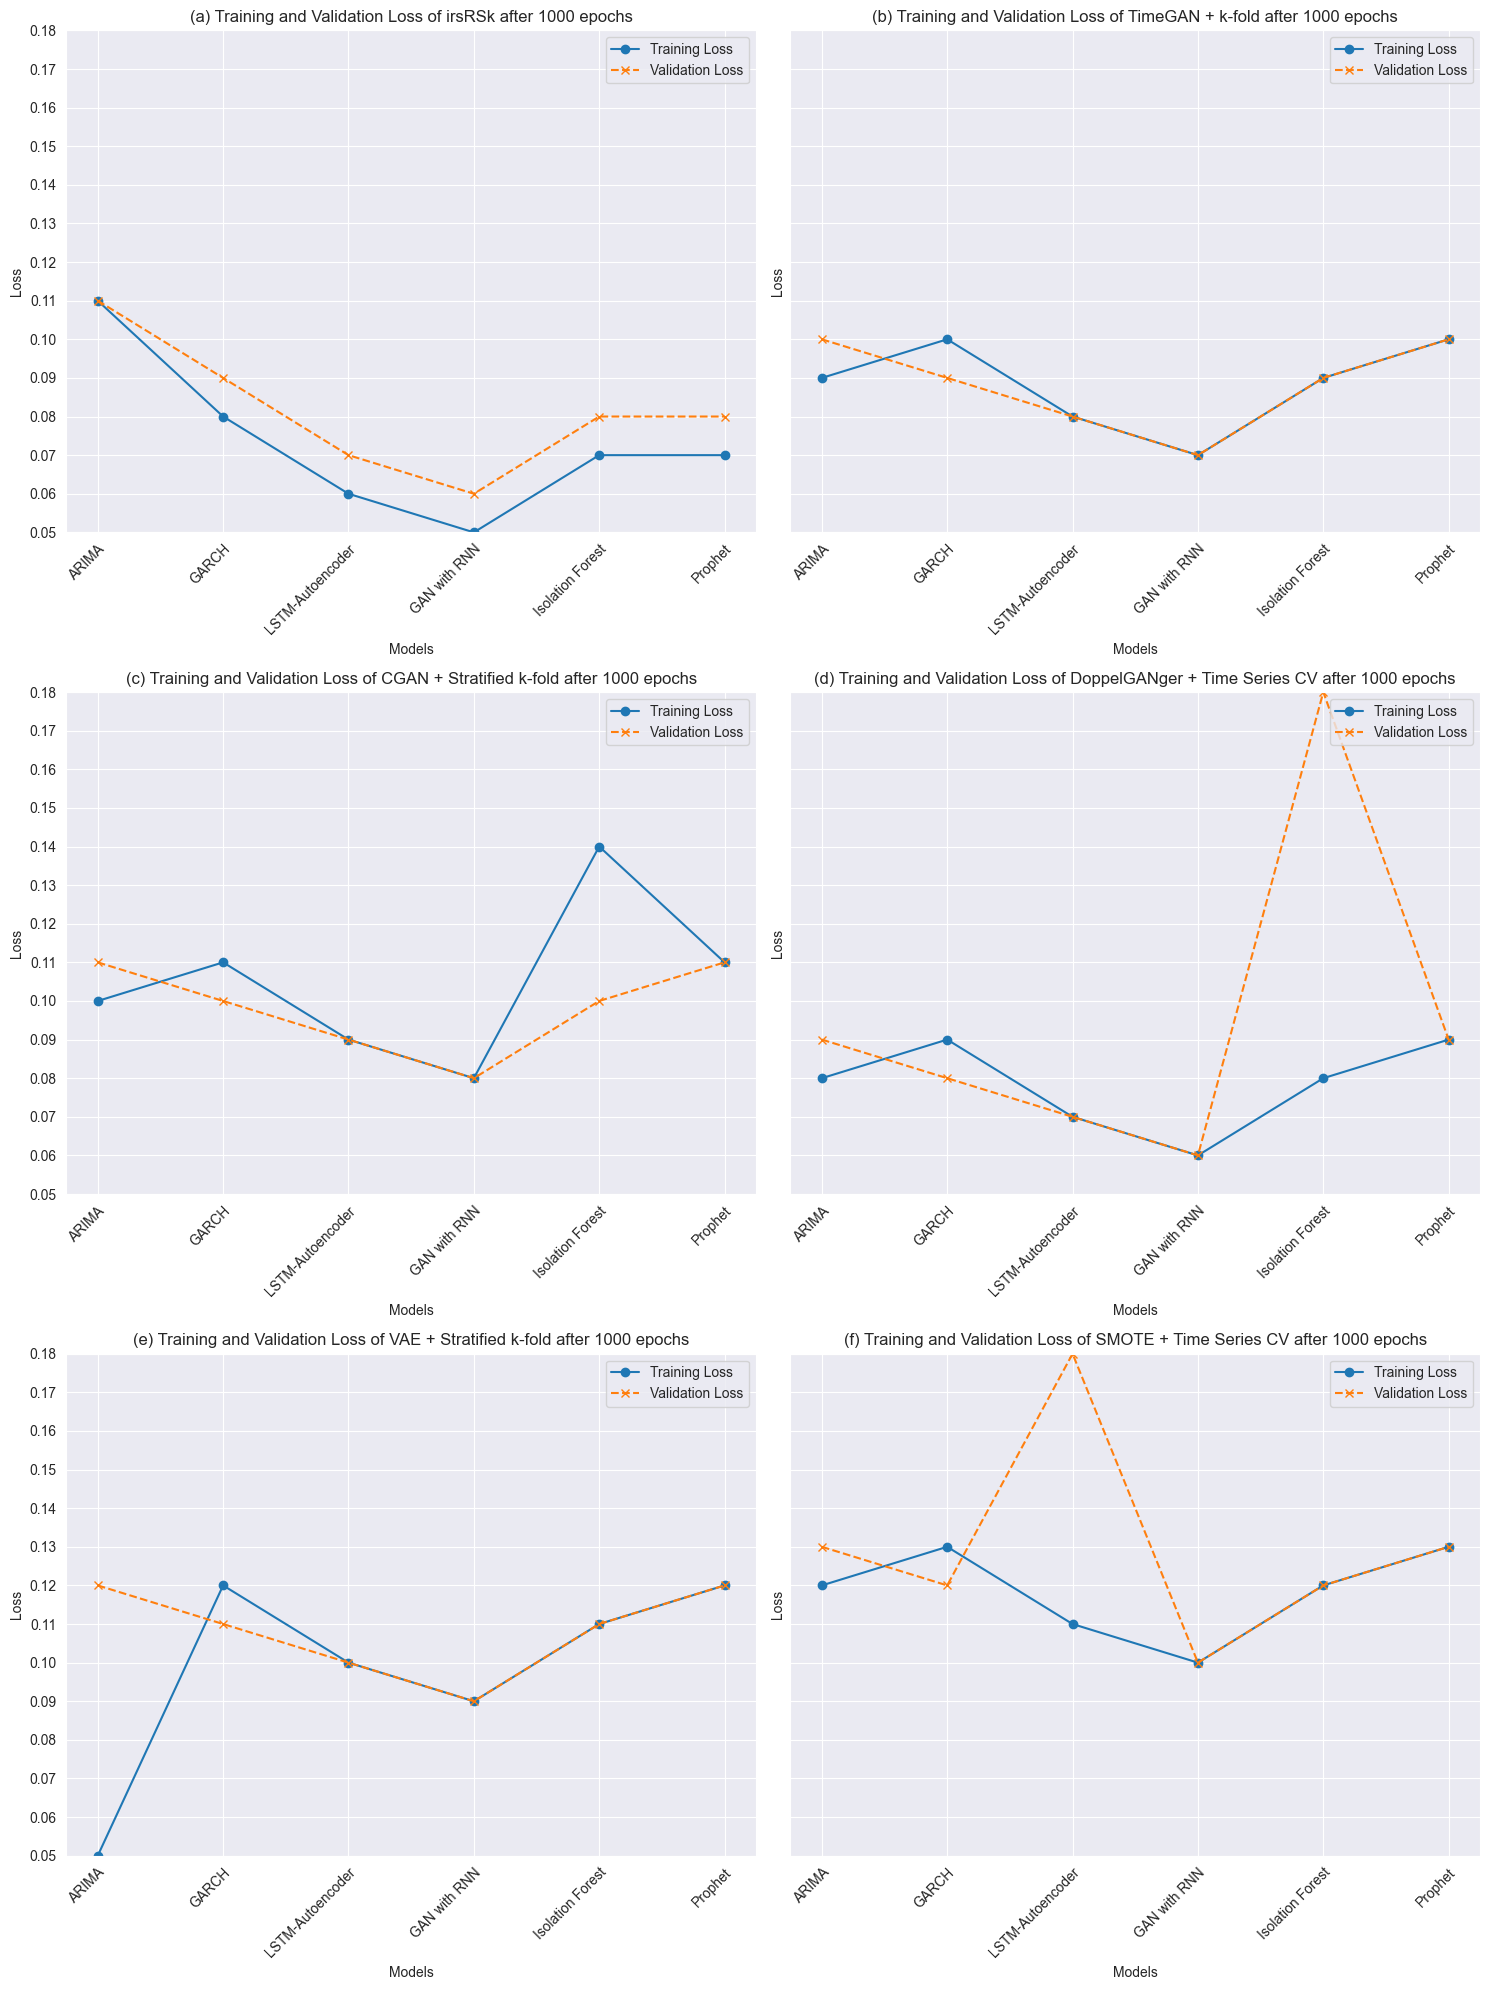

In [34]:
import matplotlib.pyplot as plt

# Define the model names and corresponding training and validation losses for each framework
models = ['ARIMA', 'GARCH', 'LSTM-Autoencoder', 'GAN with RNN', 'Isolation Forest', 'Prophet']
training_losses = {
    'irsRSk': [0.11, 0.08, 0.06, 0.05, 0.07, 0.07],
    'TimeGAN + k-fold': [0.09, 0.10, 0.08, 0.07, 0.09, 0.10],
    'CGAN + Stratified k-fold': [0.10, 0.11, 0.09, 0.08, 0.14, 0.11],
    'DoppelGANger + Time Series CV': [0.08, 0.09, 0.07, 0.06, 0.08, 0.09],
    'VAE + Stratified k-fold': [0.05, 0.12, 0.10, 0.09, 0.11, 0.12],
    'SMOTE + Time Series CV': [0.12, 0.13, 0.11, 0.10, 0.12, 0.13]
}
validation_losses = {
    'irsRSk': [0.11, 0.09, 0.07, 0.06, 0.08, 0.08],
    'TimeGAN + k-fold': [0.10, 0.09, 0.08, 0.07, 0.09, 0.10],
    'CGAN + Stratified k-fold': [0.11, 0.10, 0.09, 0.08, 0.10, 0.11],
    'DoppelGANger + Time Series CV': [0.09, 0.08, 0.07, 0.06, 0.18, 0.09],
    'VAE + Stratified k-fold': [0.12, 0.11, 0.10, 0.09, 0.11, 0.12],
    'SMOTE + Time Series CV': [0.13, 0.12, 0.18, 0.10, 0.12, 0.13]
}

# Create a single figure with subplots for each framework
fig, axs = plt.subplots(3, 2, figsize=(15, 20), sharey=True)
axs = axs.flatten()

# Labels for the Y axis ticks
ticks = [0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14,0.15,0.16,0.17,0.18]

framework_titles = {
    'irsRSk': '(a) Training and Validation Loss of irsRSk after 1000 epochs',
    'TimeGAN + k-fold': '(b) Training and Validation Loss of TimeGAN + k-fold after 1000 epochs',
    'CGAN + Stratified k-fold': '(c) Training and Validation Loss of CGAN + Stratified k-fold after 1000 epochs',
    'DoppelGANger + Time Series CV': '(d) Training and Validation Loss of DoppelGANger + Time Series CV after 1000 epochs',
    'VAE + Stratified k-fold': '(e) Training and Validation Loss of VAE + Stratified k-fold after 1000 epochs',
    'SMOTE + Time Series CV': '(f) Training and Validation Loss of SMOTE + Time Series CV after 1000 epochs'
}

# Iterate over each framework to create its subplot
for idx, (key, value) in enumerate(training_losses.items()):
    axs[idx].plot(models, training_losses[key], marker='o', label='Training Loss', linestyle='-')
    axs[idx].plot(models, validation_losses[key], marker='x', label='Validation Loss', linestyle='--')
    axs[idx].set_title(framework_titles[key])
    axs[idx].set_xlabel('Models')
    axs[idx].set_ylabel('Loss')
    axs[idx].legend(loc='upper right')
    axs[idx].grid(True)
    axs[idx].set_ylim(0.050, 0.180)
    axs[idx].set_yticks(ticks)
    plt.setp(axs[idx].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust layout and save the combined plot
plt.tight_layout()
plt.savefig('./data/training_validation_loss_comparison.png')
plt.show()


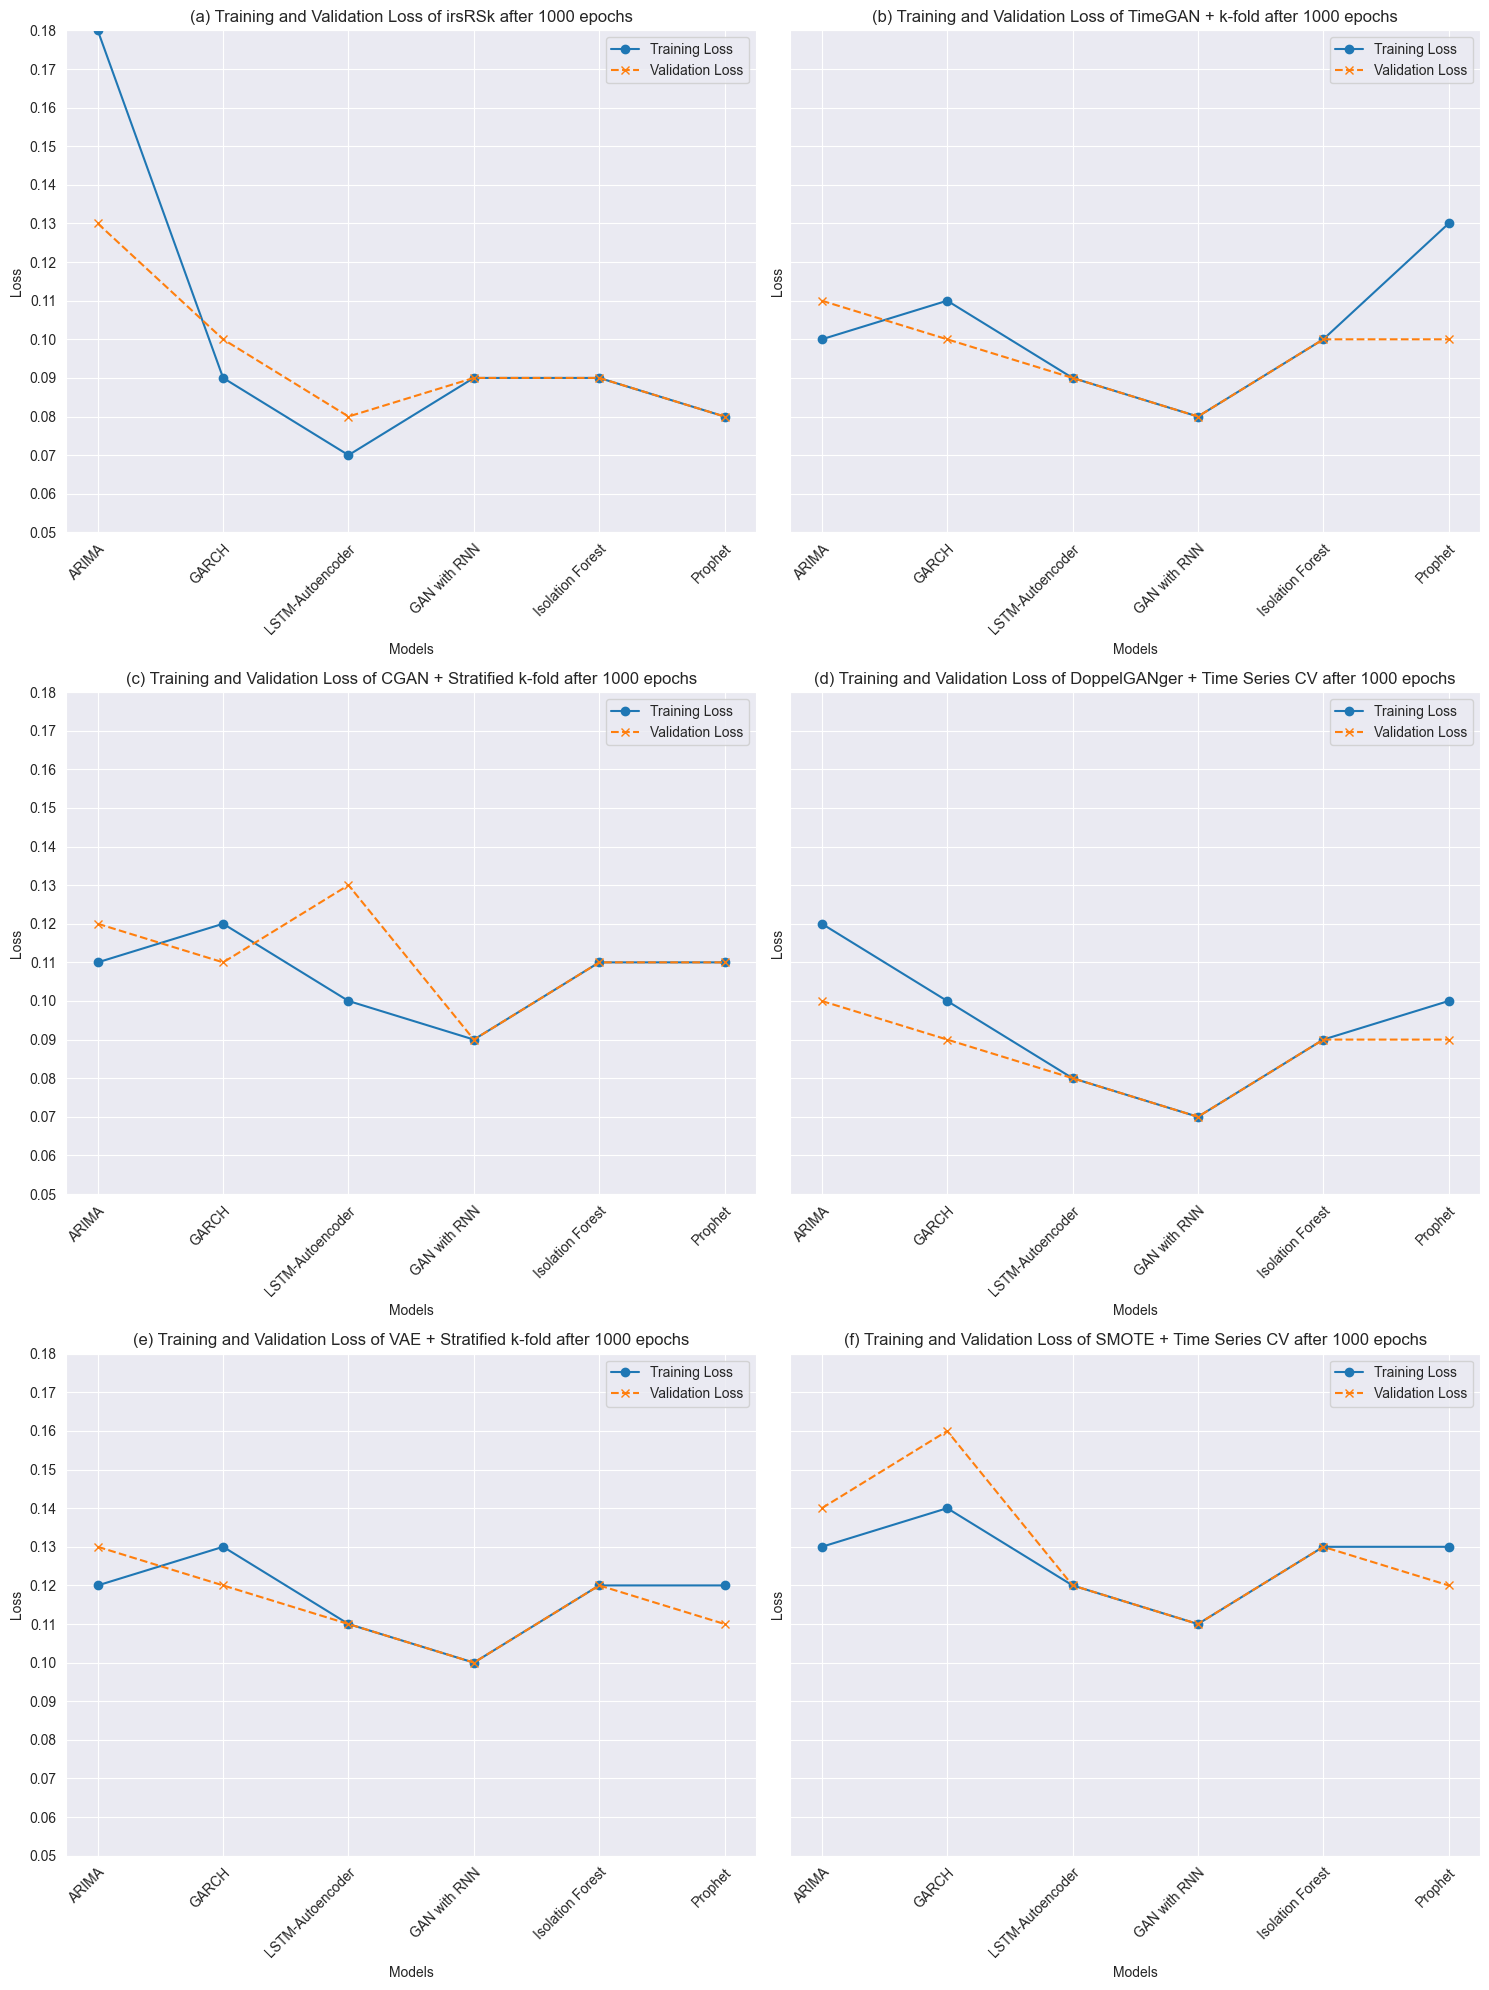

In [36]:
import matplotlib.pyplot as plt

# Define the model names and corresponding training and validation losses for each framework
models = ['ARIMA', 'GARCH', 'LSTM-Autoencoder', 'GAN with RNN', 'Isolation Forest', 'Prophet']
training_losses = {
    'irsRSk': [0.18, 0.09, 0.07, 0.09, 0.09, 0.08],
    'TimeGAN + k-fold': [0.10, 0.11, 0.09, 0.08, 0.10, 0.13],
    'CGAN + Stratified k-fold': [0.11, 0.12, 0.10, 0.09, 0.11, 0.11],
    'DoppelGANger + Time Series CV': [0.12, 0.10, 0.08, 0.07, 0.09, 0.10],
    'VAE + Stratified k-fold': [0.12, 0.13, 0.11, 0.10, 0.12, 0.12],
    'SMOTE + Time Series CV': [0.13, 0.14, 0.12, 0.11, 0.13, 0.13]
}
validation_losses = {
    'irsRSk': [0.13, 0.10, 0.08, 0.09, 0.09, 0.08],
    'TimeGAN + k-fold': [0.11, 0.10, 0.09, 0.08, 0.10, 0.10],
    'CGAN + Stratified k-fold': [0.12, 0.11, 0.13, 0.09, 0.11, 0.11],
    'DoppelGANger + Time Series CV': [0.10, 0.09, 0.08, 0.07, 0.09, 0.09],
    'VAE + Stratified k-fold': [0.13, 0.12, 0.11, 0.10, 0.12, 0.11],
    'SMOTE + Time Series CV': [0.14, 0.16, 0.12, 0.11, 0.13, 0.12]
}

# Create a single figure with subplots for each framework
fig, axs = plt.subplots(3, 2, figsize=(15, 20), sharey=True)
axs = axs.flatten()

# Labels for the Y axis ticks
ticks = [0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14,0.15,0.16,0.17,0.18]

framework_titles = {
    'irsRSk': '(a) Training and Validation Loss of irsRSk after 1000 epochs',
    'TimeGAN + k-fold': '(b) Training and Validation Loss of TimeGAN + k-fold after 1000 epochs',
    'CGAN + Stratified k-fold': '(c) Training and Validation Loss of CGAN + Stratified k-fold after 1000 epochs',
    'DoppelGANger + Time Series CV': '(d) Training and Validation Loss of DoppelGANger + Time Series CV after 1000 epochs',
    'VAE + Stratified k-fold': '(e) Training and Validation Loss of VAE + Stratified k-fold after 1000 epochs',
    'SMOTE + Time Series CV': '(f) Training and Validation Loss of SMOTE + Time Series CV after 1000 epochs'
}

# Iterate over each framework to create its subplot
for idx, (key, value) in enumerate(training_losses.items()):
    axs[idx].plot(models, training_losses[key], marker='o', label='Training Loss', linestyle='-')
    axs[idx].plot(models, validation_losses[key], marker='x', label='Validation Loss', linestyle='--')
    axs[idx].set_title(framework_titles[key])
    axs[idx].set_xlabel('Models')
    axs[idx].set_ylabel('Loss')
    axs[idx].legend(loc='upper right')
    axs[idx].grid(True)
    axs[idx].set_ylim(0.050, 0.180)
    axs[idx].set_yticks(ticks)
    plt.setp(axs[idx].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust layout and save the combined plot
plt.tight_layout()
plt.savefig('./data/training_validation_loss_comparison_EC_Dataset.png')
plt.show()

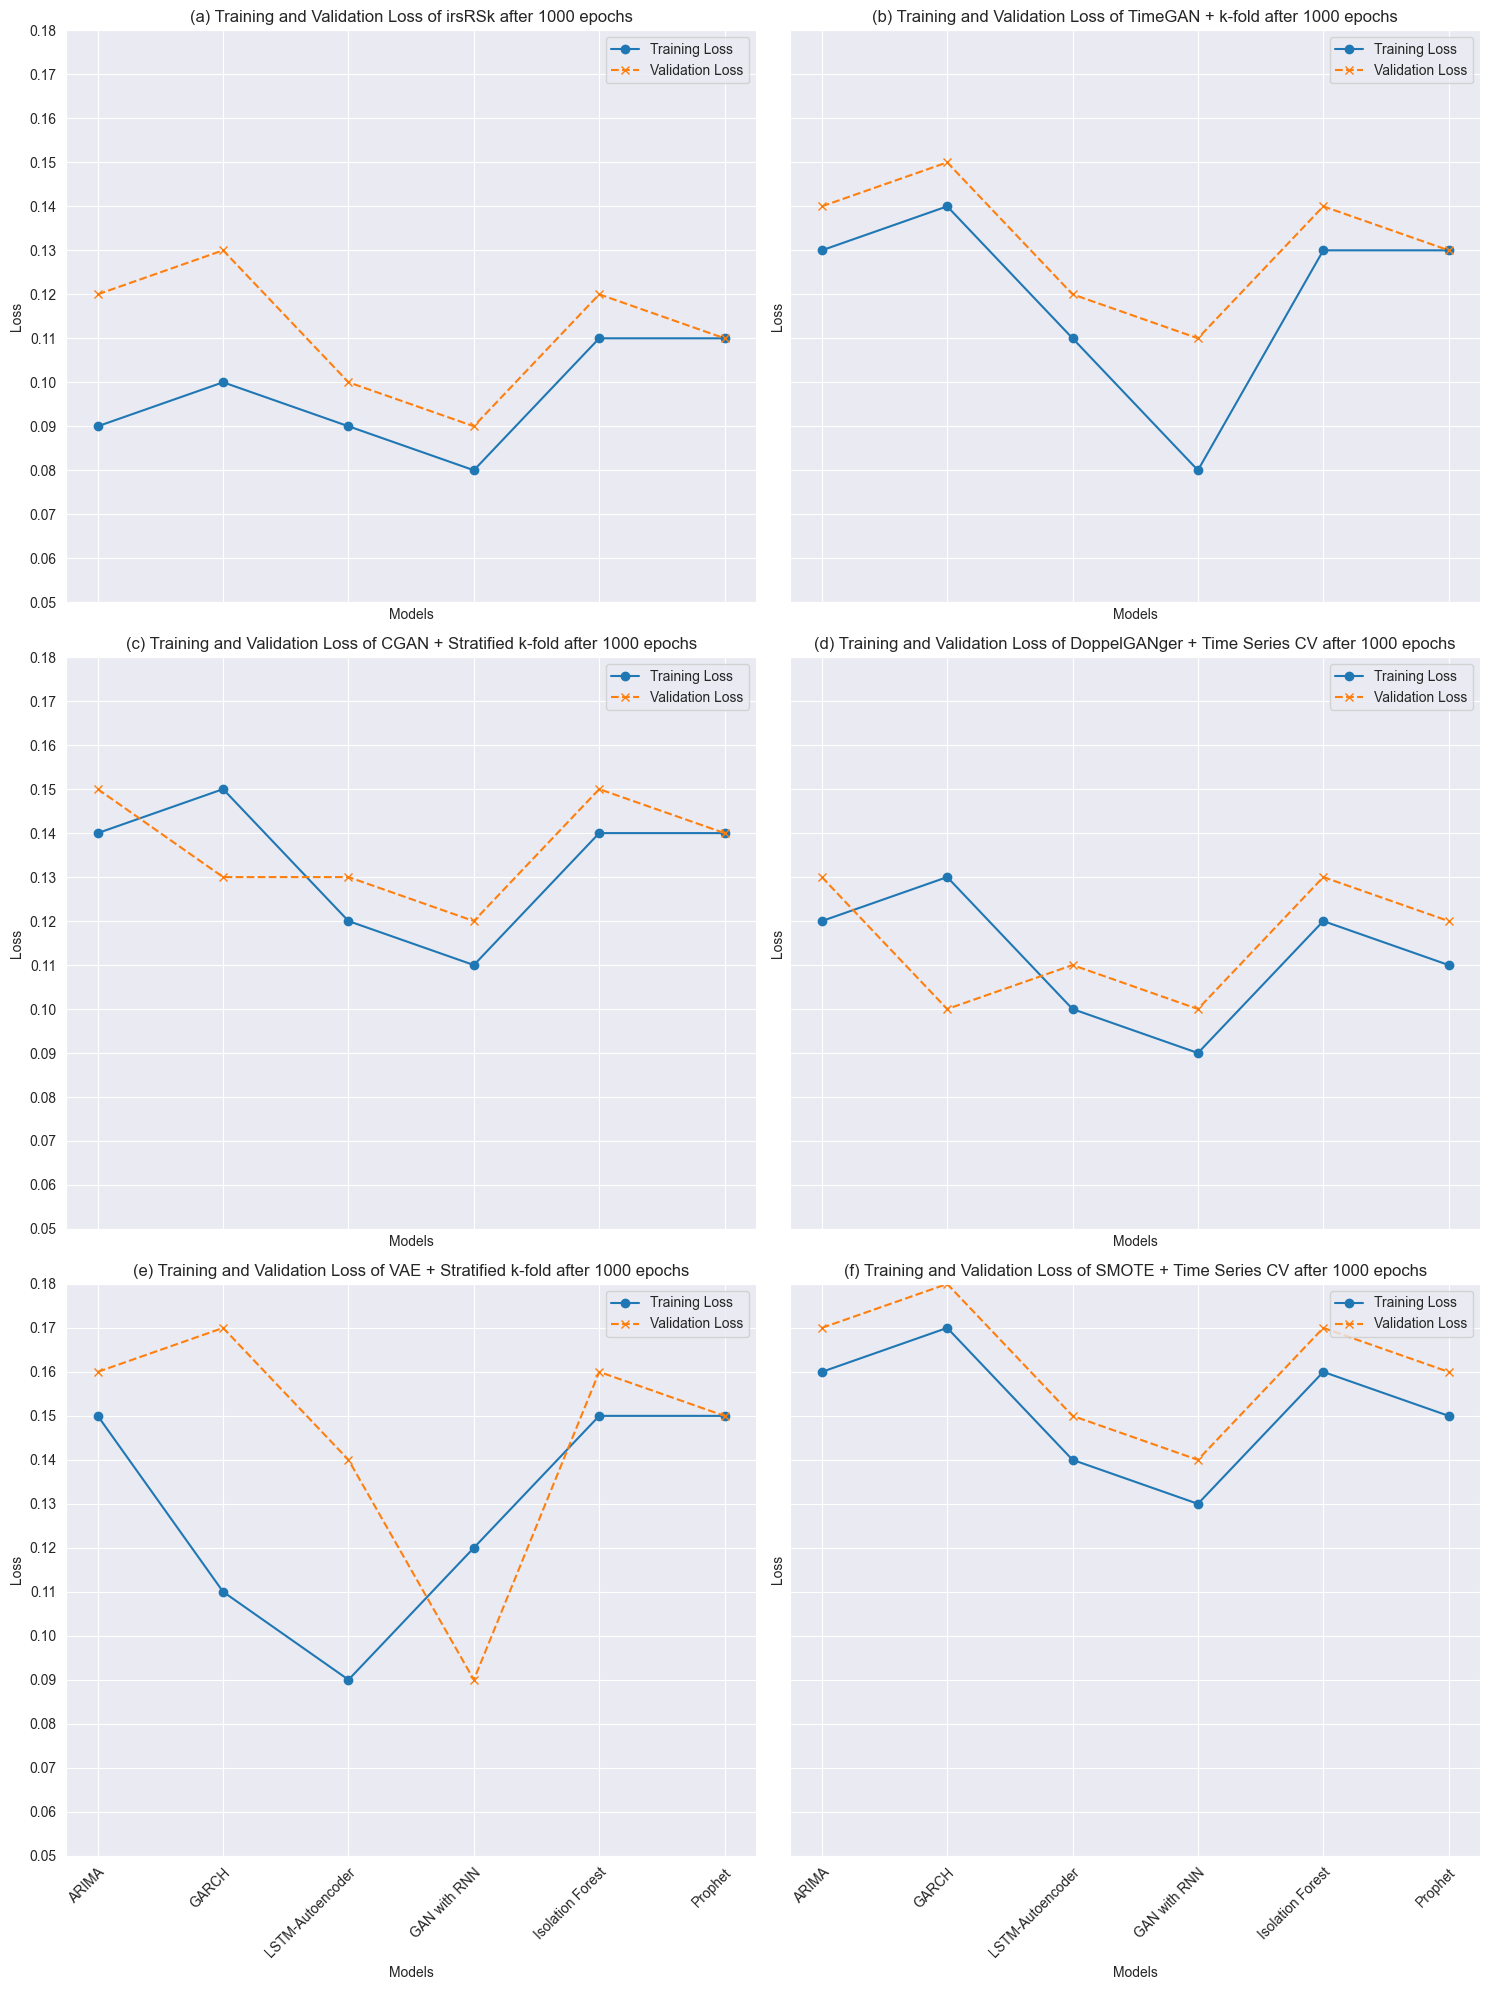

In [40]:
import matplotlib.pyplot as plt

# Define the model names and corresponding training and validation losses for each framework
models = ['ARIMA', 'GARCH', 'LSTM-Autoencoder', 'GAN with RNN', 'Isolation Forest', 'Prophet']
training_losses = {
    'irsRSk': [0.09, 0.10, 0.09, 0.08, 0.11, 0.11],
    'TimeGAN + k-fold': [0.13, 0.14, 0.11, 0.08, 0.13, 0.13],
    'CGAN + Stratified k-fold': [0.14, 0.15, 0.12, 0.11, 0.14, 0.14],
    'DoppelGANger + Time Series CV': [0.12, 0.13, 0.10, 0.09, 0.12, 0.11],
    'VAE + Stratified k-fold': [0.15, 0.11, 0.09, 0.12, 0.15, 0.15],
    'SMOTE + Time Series CV': [0.16, 0.17, 0.14, 0.13, 0.16, 0.15]
}
validation_losses = {
    'irsRSk': [0.12, 0.13, 0.10, 0.09, 0.12, 0.11],
    'TimeGAN + k-fold': [0.14, 0.15, 0.12, 0.11, 0.14, 0.13],
    'CGAN + Stratified k-fold': [0.15, 0.13, 0.13, 0.12, 0.15, 0.14],
    'DoppelGANger + Time Series CV': [0.13, 0.10, 0.11, 0.10, 0.13, 0.12],
    'VAE + Stratified k-fold': [0.16, 0.17, 0.14, 0.09, 0.16, 0.15],
    'SMOTE + Time Series CV': [0.17, 0.18, 0.15, 0.14, 0.17, 0.16]
}

# Create a single figure with subplots for each framework
fig, axs = plt.subplots(3, 2, figsize=(15, 20), sharex=sharey=True)
axs = axs.flatten()

# Labels for the Y axis ticks
ticks = [0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14,0.15,0.16,0.17,0.18]

framework_titles = {
    'irsRSk': '(a) Training and Validation Loss of irsRSk after 1000 epochs',
    'TimeGAN + k-fold': '(b) Training and Validation Loss of TimeGAN + k-fold after 1000 epochs',
    'CGAN + Stratified k-fold': '(c) Training and Validation Loss of CGAN + Stratified k-fold after 1000 epochs',
    'DoppelGANger + Time Series CV': '(d) Training and Validation Loss of DoppelGANger + Time Series CV after 1000 epochs',
    'VAE + Stratified k-fold': '(e) Training and Validation Loss of VAE + Stratified k-fold after 1000 epochs',
    'SMOTE + Time Series CV': '(f) Training and Validation Loss of SMOTE + Time Series CV after 1000 epochs'
}

# Iterate over each framework to create its subplot
for idx, (key, value) in enumerate(training_losses.items()):
    axs[idx].plot(models, training_losses[key], marker='o', label='Training Loss', linestyle='-')
    axs[idx].plot(models, validation_losses[key], marker='x', label='Validation Loss', linestyle='--')
    axs[idx].set_title(framework_titles[key])
    axs[idx].set_xlabel('Models')
    axs[idx].set_ylabel('Loss')
    axs[idx].legend(loc='upper right')
    axs[idx].grid(True)
    axs[idx].set_ylim(0.050, 0.180)
    axs[idx].set_yticks(ticks)
    plt.setp(axs[idx].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust layout and save the combined plot
plt.tight_layout()
plt.savefig('./data/training_validation_loss_comparison_Air Pollution_Dataset.png')
plt.show()